In [6]:
import pandas as pd

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

##### import data

In [7]:
#repo=pd.read_csv('CommitData/C_0voice_campus_recruitmen_questions.csv', sep=",")

repo=pd.read_csv('../data/ml_data/graph_data.csv', sep=",",index_col=0)
#repo=pd.read_csv('data/CommitData/C_google_WebFundamentals.csv', sep=",")
#repo=pd.read_csv('data/CommitData/C_facebook_react.csv', sep=",")


In [8]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   owner                  956 non-null    object 
 1   repo                   956 non-null    object 
 2   stars                  956 non-null    int64  
 3   dateCreated            956 non-null    int64  
 4   datePushed             956 non-null    int64  
 5   numCommits             956 non-null    int64  
 6   openIssues             956 non-null    int64  
 7   closedIssues           956 non-null    int64  
 8   totalIssues            956 non-null    int64  
 9   totalAdditions         956 non-null    float64
 10  totalDeletions         956 non-null    float64
 11  fileCount              956 non-null    int64  
 12  include                956 non-null    bool   
 13  Repository             956 non-null    object 
 14  Repository URL         956 non-null    object 
 15  Total nloc 

### Data Cleaning


In [9]:
repo.isnull().sum()

owner                      0
repo                       0
stars                      0
dateCreated                0
datePushed                 0
numCommits                 0
openIssues                 0
closedIssues               0
totalIssues                0
totalAdditions             0
totalDeletions             0
fileCount                  0
include                    0
Repository                 0
Repository URL             0
Total nloc                 0
Avg.NLOC                   0
AvgCCN                     0
Avg.token                  0
Fun Cnt                    0
file threshold cnt         0
Fun Rt                     0
nloc Rt                    0
Halstead Volume           53
Maintainability Index    135
dtype: int64

In [10]:
#repo = repo.fillna(0)
repo = repo.dropna()

In [11]:
# Convert Unix timestamp to datetime for recency calculation
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')
repo = repo.reset_index()

In [12]:
repo.head()

,index,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,...,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index
0,0,facebook,react,216019,2013-05-24 16:15:54,2023-12-08 00:51:20,16117,1557,25219,26776,...,390639,8.2,1.4,37.6,31396,202,0.01,0.06,1831.576017,57.031450
1,1,pallets,flask,65156,2010-04-06 11:11:59,2023-12-07 03:48:51,5205,3,5081,5084,...,13230,8.2,1.5,42.7,1403,3,0.00,0.02,2303.064603,56.321431
2,2,google,guetzli,12840,2016-10-21 15:13:18,2023-04-22 19:41:10,145,121,153,274,...,7820,20.2,4.3,169.5,328,16,0.05,0.25,2521.773565,47.127959
3,4,d3,d3,106797,2010-09-27 17:22:42,2023-12-01 14:29:45,4480,14,3334,3348,...,809,5.6,1.9,40.4,59,0,0.00,0.00,1158.238502,61.970744
4,7,vuejs,vue,205936,2013-07-29 03:24:51,2023-12-08 01:42:25,3581,606,11887,12493,...,62680,7.9,1.6,44.2,6427,39,0.01,0.05,1369.738383,58.241212


In [13]:
from datetime import datetime

# Calculate the ratio of openIssues to closedIssues + 1 (to avoid division by zero)
repo['open_close_ratio'] = repo['openIssues'] / (repo['closedIssues'] + 1)


# Convert datePushed to datetime and calculate repo age in days and days since last push
repo['datePushed'] = pd.to_datetime(repo['datePushed'])
repo['dateCreated'] = pd.to_datetime(repo['dateCreated'])


most_recent_push_date = repo['datePushed'].max()

# Calculating days since last push
repo['daysSinceLastPush'] = (most_recent_push_date - repo['datePushed']).dt.days


# Calculate commit frequency (commits per day)
repo['repoAgeDays'] = (repo['datePushed'] - repo['dateCreated']).dt.days

#reciprocal
repo['commitFrequency'] = repo['repoAgeDays'] / repo['numCommits']


# Calculate the ratio of closed to total issues as an indicator of issue management efficiency
repo['closedIssueRatio'] = repo['closedIssues'] / (repo['totalIssues']+ 1)

# Calculate the ratio of open issues to total issues as an indicator of current pending tasks
repo['openIssueRatio'] = repo['openIssues'] / (repo['totalIssues']+ 1)

 
analysis_columns = ['owner', 'repo', 'numCommits', 'repoAgeDays', 'commitFrequency', 'daysSinceLastPush']
repo_analysis = repo[analysis_columns]


repo_analysis.head()


,owner,repo,numCommits,repoAgeDays,commitFrequency,daysSinceLastPush
0,facebook,react,16117,3849,0.238816,0
1,pallets,flask,5205,4992,0.959078,1
2,google,guetzli,145,2374,16.372414,229
3,d3,d3,4480,4812,1.074107,6
4,vuejs,vue,3581,3783,1.056409,0


In [15]:
repo.to_csv('../data/ml_data/graph_data_stats.csv')

In [16]:
most_recent_push_date = repo['datePushed'].max()
repo['datePushed'].max()

Timestamp('2023-12-08 04:49:22')

In [507]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 955
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    int64         
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    int64         
 6   openIssues             956 non-null    int64         
 7   closedIssues           956 non-null    int64         
 8   totalIssues            956 non-null    int64         
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    int64         
 12  include                956 non-null    bool          
 13  Repository

In [508]:
numerical_features = repo.select_dtypes(include=[np.number]).columns.tolist()
numerical_features


['stars',
 'numCommits',
 'openIssues',
 'closedIssues',
 'totalIssues',
 'totalAdditions',
 'totalDeletions',
 'fileCount',
 'Total nloc',
 'Avg.NLOC',
 'AvgCCN',
 'Avg.token',
 'Fun Cnt',
 'file threshold cnt',
 'Fun Rt',
 'nloc Rt',
 'Halstead Volume',
 'Maintainability Index',
 'open_close_ratio',
 'daysSinceLastPush',
 'repoAgeDays',
 'commitFrequency',
 'closedIssueRatio',
 'openIssueRatio']

In [509]:

corr = repo[numerical_features].corr()
corr.style.background_gradient(cmap='coolwarm')

,stars,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,Total nloc,Avg.NLOC,AvgCCN,Avg.token,Fun Cnt,file threshold cnt,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio
stars,1.000000,0.156489,0.107605,0.252436,0.251074,-0.017753,-0.016834,0.018951,-0.000030,-0.092954,-0.138474,-0.106330,-0.014931,-0.023419,-0.071190,-0.093699,-0.061098,-0.222973,-0.068227,-0.182024,0.004978,0.090457,0.078447,-0.056935
numCommits,0.156489,1.000000,0.225667,0.694020,0.680301,0.306702,0.278286,0.379581,0.320744,0.108710,0.105935,0.127210,0.314445,0.226077,0.087947,0.109488,0.026372,0.070215,-0.187754,-0.181061,0.164794,0.777141,0.207296,-0.212331
openIssues,0.107605,0.225667,1.000000,0.404539,0.519987,0.122532,0.134824,0.253427,0.152033,0.065722,0.099214,0.083667,0.140294,0.108352,0.104458,0.146650,0.002148,0.064894,0.387350,-0.063385,-0.016973,0.168837,-0.407211,0.472944
closedIssues,0.252436,0.694020,0.404539,1.000000,0.991515,0.219493,0.210483,0.318726,0.296141,0.077661,0.020676,0.059348,0.266128,0.150438,0.012802,0.057326,0.016197,0.084446,-0.173729,-0.155486,0.107660,0.515717,0.207008,-0.192738
totalIssues,0.251074,0.680301,0.519987,0.991515,1.000000,0.222426,0.215758,0.333717,0.298210,0.081878,0.033415,0.067325,0.268509,0.155913,0.026806,0.074389,0.015434,0.088098,-0.107206,-0.154235,0.098143,0.505685,0.135466,-0.112795
totalAdditions,-0.017753,0.306702,0.122532,0.219493,0.222426,1.000000,0.937368,0.364307,0.380133,0.051706,0.110579,0.094421,0.457625,0.378353,0.069086,0.096526,0.088298,0.058918,-0.057057,-0.043346,0.025243,0.252459,0.061128,-0.057566
totalDeletions,-0.016834,0.278286,0.134824,0.210483,0.215758,0.937368,1.000000,0.266993,0.252810,0.053963,0.118636,0.101092,0.336335,0.293904,0.065274,0.090322,0.062468,0.054061,-0.060153,-0.036343,0.021122,0.225781,0.065386,-0.062095
fileCount,0.018951,0.379581,0.253427,0.318726,0.333717,0.364307,0.266993,1.000000,0.316630,0.060885,0.070885,0.066576,0.379446,0.259153,0.049504,0.089400,-0.041427,0.067635,0.006236,-0.064684,-0.071692,0.335241,-0.031762,0.052097
Total nloc,-0.000030,0.320744,0.152033,0.296141,0.298210,0.380133,0.252810,0.316630,1.000000,0.092075,0.076694,0.104113,0.662110,0.500754,0.066819,0.144686,0.154297,0.080113,-0.021137,-0.045554,-0.003676,0.266839,0.019549,-0.008844
Avg.NLOC,-0.092954,0.108710,0.065722,0.077661,0.081878,0.051706,0.053963,0.060885,0.092075,1.000000,0.717625,0.937831,0.021985,0.087938,0.396783,0.427952,0.086191,0.224065,0.063156,-0.079852,0.003699,0.106228,-0.064807,0.089825


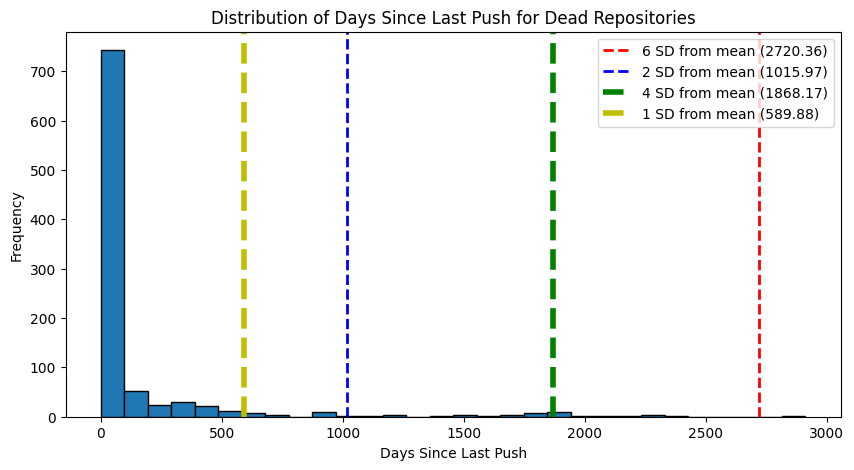

In [510]:
import matplotlib.pyplot as plt
# We'll use the filtered_repo which contains 'daysSinceLastPush' between 0 and 300
# First calculate the mean and standard deviation
mean_value = repo['daysSinceLastPush'].mean()
std_dev = repo['daysSinceLastPush'].std()

# Calculate the position of the line at 6 standard deviations from the mean
line_position = mean_value + 6*std_dev

 
plt.figure(figsize=(10, 5))
plt.hist(repo['daysSinceLastPush'], bins=30,  edgecolor='black')
plt.title('Distribution of Days Since Last Push for Dead Repositories')
plt.xlabel('Days Since Last Push')
plt.ylabel('Frequency')

# Calculate the position of the line at 6 standard deviations from the mean
line_position = mean_value + 6*std_dev
plt.axvline(line_position, color='r', linestyle='dashed', linewidth=2, label=f'6 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 2 standard deviations from the mean
line_position = mean_value + 2*std_dev
plt.axvline(line_position, color='b', linestyle='dashed', linewidth=2, label=f'2 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 4 standard deviations from the mean
line_position = mean_value + 4*std_dev
plt.axvline(line_position, color='g', linestyle='dashed', linewidth=4, label=f'4 SD from mean ({line_position:.2f})')

# Calculate the position of the line at 1 standard deviations from the mean
line_position = mean_value + 1*std_dev
plt.axvline(line_position, color='y', linestyle='dashed', linewidth=4, label=f'1 SD from mean ({line_position:.2f})')

plt.legend()

plt.show()



In [512]:
repo[numerical_features].describe()


,stars,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,Total nloc,Avg.NLOC,...,Fun Rt,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio
count,956.000000,956.000000,956.000000,956.000000,956.000000,9.560000e+02,9.560000e+02,956.000000,9.560000e+02,956.000000,...,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000,956.000000
mean,29805.413180,3714.040795,306.952929,3458.986402,3765.939331,1.172261e+06,8.380684e+05,820.950837,5.502005e+04,8.015167,...,0.009414,0.065858,2358.796710,49.171442,0.131778,163.783473,3704.860879,1.063232,0.900777,0.094601
std,35470.047796,2907.087701,553.801241,3639.012424,3896.104850,2.764789e+06,1.939390e+06,1564.425185,1.526187e+05,6.081393,...,0.015277,0.090502,3371.094768,20.561478,0.235925,426.095656,937.036013,0.965329,0.124826,0.112537
min,23.000000,16.000000,0.000000,0.000000,0.000000,3.660000e+02,1.690000e+02,1.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.015342,0.000000,0.000000
25%,13232.750000,1655.250000,37.750000,1274.250000,1394.500000,1.253390e+05,6.583200e+04,122.750000,5.097500e+03,5.400000,...,0.000000,0.000000,874.207538,51.493710,0.015819,1.000000,3131.250000,0.473259,0.875080,0.015573
50%,20493.000000,2630.000000,120.500000,2295.000000,2587.000000,3.586800e+05,2.242140e+05,324.000000,1.647850e+04,7.500000,...,0.000000,0.030000,1538.734183,56.278995,0.062071,8.000000,3662.500000,0.753170,0.940069,0.058443
75%,32262.000000,5003.750000,390.000000,4229.500000,4620.500000,1.052487e+06,6.869100e+05,831.000000,5.013100e+04,9.900000,...,0.010000,0.100000,2625.480073,59.932121,0.140941,70.250000,4436.750000,1.327224,0.982857,0.123531
max,304317.000000,16117.000000,7888.000000,26186.000000,28216.000000,3.149048e+07,2.055987e+07,14462.000000,2.595852e+06,88.000000,...,0.140000,0.590000,32555.771081,74.693650,2.030303,2912.000000,5745.000000,8.752418,0.999785,0.670000


In [513]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from joblib import dump, load


# Select the numeric features
numeric_features = repo.select_dtypes(include=[np.number]).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on your data and transform it
repo[numeric_features] = scaler.fit_transform(repo[numeric_features])
 
dump(scaler, 'scaler.joblib')

['scaler.joblib']

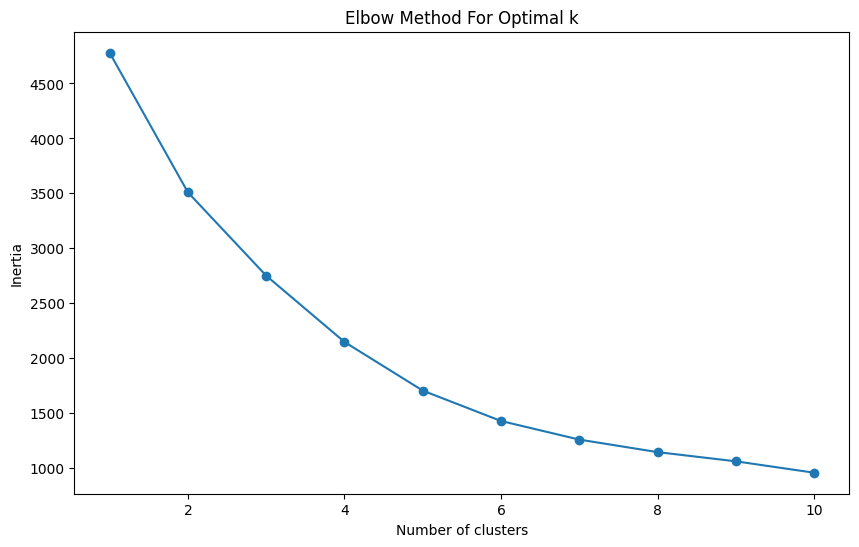

In [514]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
 
features = repo[['commitFrequency', 'daysSinceLastPush','numCommits','closedIssueRatio','stars']]
 
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Finding an appropriate number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_normalized)
    inertia.append(kmeans.inertia_)

 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [515]:
# Assuming an optimal number of clusters based on the Elbow Method (for demonstration, we choose 3)
optimal_clusters = 2

# Applying K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

# Adding the cluster labels to our dataset
repo['Cluster'] = clusters
 
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=['commitFrequency', 'daysSinceLastPush','numCommits','closedIssueRatio','stars'])

centroid_df['Cluster'] = centroid_df.index

centroid_df


,commitFrequency,daysSinceLastPush,numCommits,closedIssueRatio,stars,Cluster
0,-0.438353,0.076797,-0.494168,-0.084719,-0.137473,0
1,1.244641,-0.218055,1.403119,0.240548,0.390334,1


Cluster 0 as "dead" or inactive,

Cluster 1 as "dormant" or minimally active,

Cluster 2 as "alive" or highly active.

In [516]:
from sklearn.cluster import KMeans
 
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=2, random_state=42)
repo['Cluster'] = kmeans.fit_predict(features_normalized)


In [517]:
cluster_mappings = {1: 'alive', 0: 'dead'}
repo['Cluster'] = repo['Cluster'].replace(cluster_mappings)

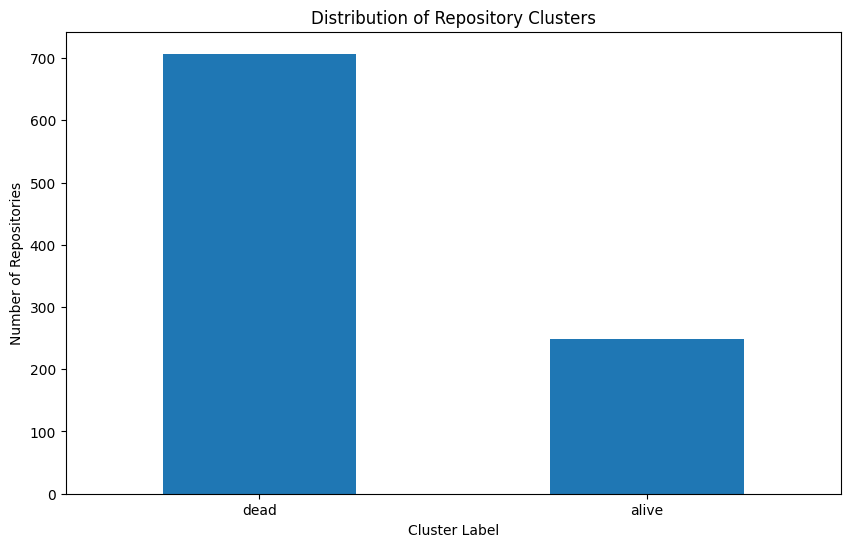

In [518]:
# Creating a bar plot for the cluster distribution
cluster_counts = repo['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)  # To keep the cluster labels horizontal
plt.show()


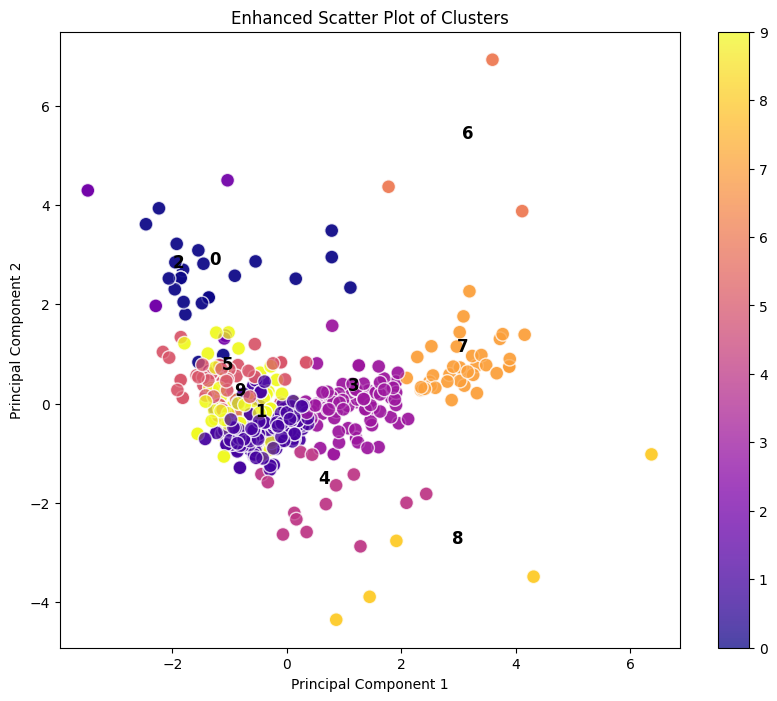

In [547]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
principal_components = pca.fit_transform(features_normalized)

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

# Calculate the cluster centers for annotations
cluster_centers = pca.transform(kmeans.cluster_centers_)

# Plotting the scatter plot with enhanced visuals
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='plasma', marker='o', edgecolor='w', s=100, alpha=0.75)

# Annotate the cluster centers
for idx, center in enumerate(cluster_centers):
    plt.annotate(idx, (center[0], center[1]), textcoords="offset points", xytext=(0,10), ha='center', fontsize=12, color='black', weight='bold')

plt.title('Enhanced Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)  # To show the cluster colors
plt.show()


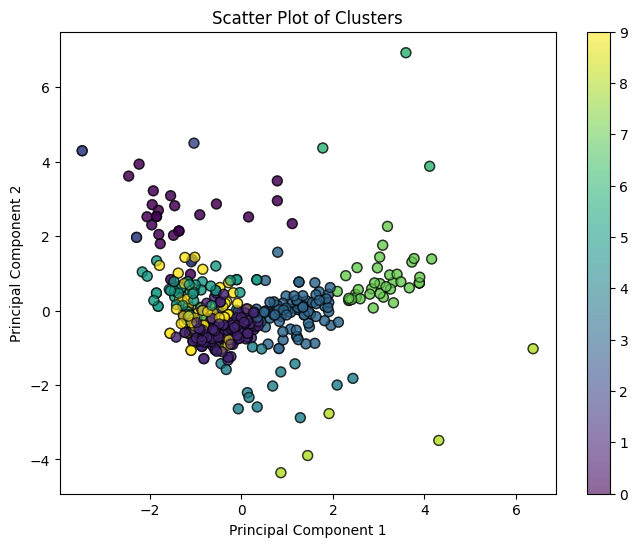

In [520]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principal_components = pca.fit_transform(features_normalized)

kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(features_normalized)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50, alpha=0.6)
plt.title('Scatter Plot of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()   
plt.show()


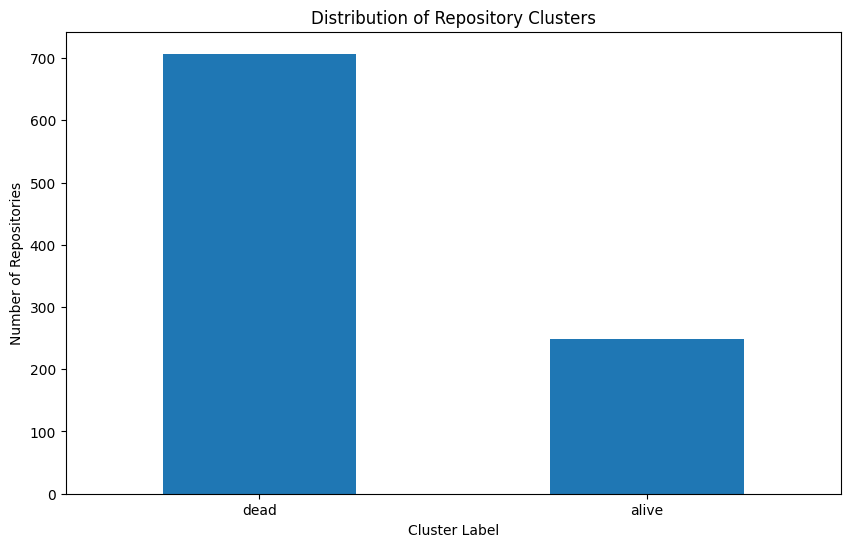

In [521]:
 
cluster_counts = repo['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)   
plt.show()


In [522]:
# First, add the cluster labels back to your original DataFrame
repo['Cluster'] = clusters

# Aggregate the cluster statistics
cluster_stats = repo.groupby('Cluster').agg({
    'daysSinceLastPush': 'median',  # Using median to minimize the effect of outliers
    'commitFrequency': 'median'
})

# Determine the cluster labels based on the aggregated statistics
# This is a simplification and should be adjusted based on actual cluster stats
cluster_stats['Status'] = np.where(
    (cluster_stats['daysSinceLastPush'] > cluster_stats['daysSinceLastPush'].median()) & 
    (cluster_stats['commitFrequency'] < cluster_stats['commitFrequency'].median()),
    'dead',
    'alive'
)

 
repo = repo.merge(cluster_stats['Status'], left_on='Cluster', right_index=True)

 


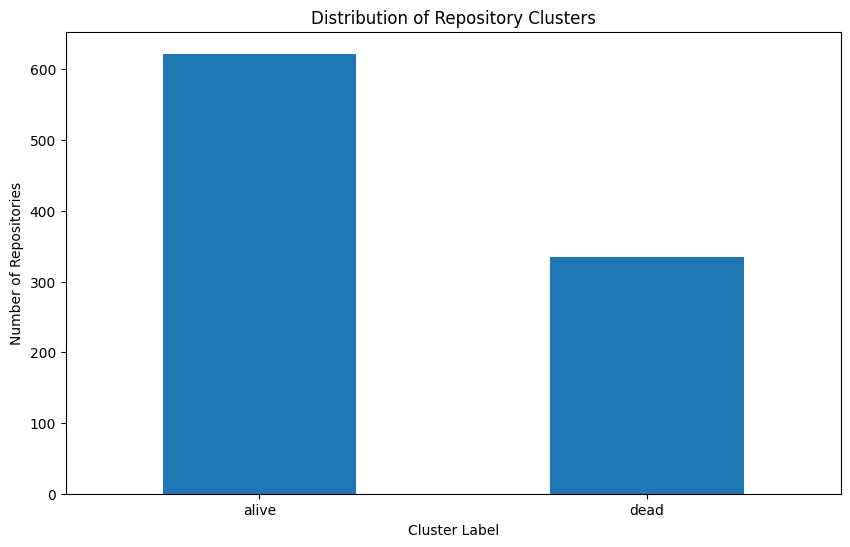

In [523]:
# Creating a bar plot for the cluster distribution
cluster_counts = repo['Status'].value_counts()

plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Repository Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Repositories')
plt.xticks(rotation=0)  # To keep the cluster labels horizontal
plt.show()


In [524]:
scaler = load('scaler.joblib')

# Use the loaded scaler to invert the transformation
repo[numeric_features] = scaler.inverse_transform(repo[numeric_features])

In [525]:
sorted_repo = repo.sort_values(by='daysSinceLastPush', ascending=False)

 
sorted_repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head()

,owner,repo,daysSinceLastPush,Status
877,JakeWharton,ActionBarSherlock,2912.0,dead
392,JakeWharton,ActionBarSherlock,2912.0,dead
866,facebookarchive,three20,2410.0,dead
381,facebookarchive,three20,2410.0,dead
752,nathanmarz,storm,2305.0,dead


In [526]:
mean_days = repo['daysSinceLastPush'].mean()
std_days = repo['daysSinceLastPush'].std()

# Calculate the threshold for being classified as "dead"
dead_threshold = mean_days + 1 * std_days

repo.loc[repo['daysSinceLastPush'] > dead_threshold, 'Status'] = 'dead'  
 
print(repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head())


              owner                         repo  daysSinceLastPush Status
0          facebook                        react                0.0  alive
3   EbookFoundation       free-programming-books                2.0  alive
6      sindresorhus                      awesome                1.0  alive
13          jwasham  coding-interview-university                3.0  alive
42    kamranahmedse            developer-roadmap                0.0  alive


In [527]:
# Calculate mean and standard deviation for 'daysSinceLastPush'
mean_days = repo['daysSinceLastPush'].mean()
std_days = repo['daysSinceLastPush'].std()

# Calculate the threshold for being classified as "dead"
alive_threshold = mean_days - 1 * std_days

repo.loc[repo['daysSinceLastPush'] <= alive_threshold, 'Status'] = 'alive'  # Repos below the threshold are "dead"

print(repo[['owner', 'repo', 'daysSinceLastPush', 'Status']].head())


              owner                         repo  daysSinceLastPush Status
0          facebook                        react                0.0  alive
3   EbookFoundation       free-programming-books                2.0  alive
6      sindresorhus                      awesome                1.0  alive
13          jwasham  coding-interview-university                3.0  alive
42    kamranahmedse            developer-roadmap                0.0  alive


#### alive repos

In [530]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 953
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    float64       
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    float64       
 6   openIssues             956 non-null    float64       
 7   closedIssues           956 non-null    float64       
 8   totalIssues            956 non-null    float64       
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    float64       
 12  include                956 non-null    bool          
 13  Repository

In [531]:
alive_repos = repo[repo['Status'] == 'alive']

descriptive_stats = alive_repos.describe()

descriptive_stats


,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
count,618.000000,618,618,618.000000,618.000000,618.000000,618.000000,6.180000e+02,6.180000e+02,618.000000,...,618.000000,618.000000,6.180000e+02,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,35098.592233,2013-04-07 11:50:27.828478976,2023-10-23 08:04:39.668284928,4635.001618,238.729773,4379.228155,4617.957929,1.455776e+06,1.019584e+06,984.380259,...,0.062168,2471.964889,4.962422e+01,0.053476,45.373786,3850.322006,1.279620,0.953469,0.044477,2.533981
min,681.000000,2008-03-10 07:34:08,2022-04-27 07:57:04,259.000000,0.000000,0.000000,2.000000,3.503000e+03,1.897000e+03,1.000000,...,0.000000,0.000000,-7.105427e-15,0.000000,0.000000,499.000000,0.091037,0.000000,0.000000,1.000000
25%,14323.250000,2011-06-04 21:43:56.750000128,2023-11-09 07:36:44,2131.000000,21.250000,1752.000000,1823.000000,1.700410e+05,9.567300e+04,141.000000,...,0.000000,890.287458,5.103929e+01,0.009594,0.000000,3201.000000,0.560239,0.939308,0.009503,1.000000
50%,23852.000000,2013-07-20 18:53:45,2023-12-04 04:38:05,3666.500000,64.000000,3136.000000,3265.500000,4.705710e+05,3.046010e+05,379.000000,...,0.030000,1582.504638,5.616053e+01,0.025712,4.000000,3733.000000,0.928826,0.972209,0.025068,1.000000
75%,37377.000000,2015-01-13 19:45:03,2023-12-07 11:38:04,6397.000000,246.000000,5435.000000,5723.000000,1.393203e+06,9.350870e+05,1035.000000,...,0.080000,2678.784997,6.034017e+01,0.063851,28.000000,4526.000000,1.739245,0.989569,0.060018,3.000000
max,304317.000000,2022-03-22 09:34:51,2023-12-08 04:49:22,16117.000000,2701.000000,26186.000000,28216.000000,3.149048e+07,2.055987e+07,14462.000000,...,0.490000,32555.771081,7.469365e+01,2.000000,589.000000,5745.000000,8.752418,0.999785,0.666667,8.000000
std,41993.736191,NaN,NaN,3132.628296,409.939356,4026.377956,4305.260516,3.267479e+06,2.238622e+06,1814.714528,...,0.087496,3628.146586,2.022056e+01,0.125077,109.224871,828.400972,1.050538,0.071775,0.058831,2.096453


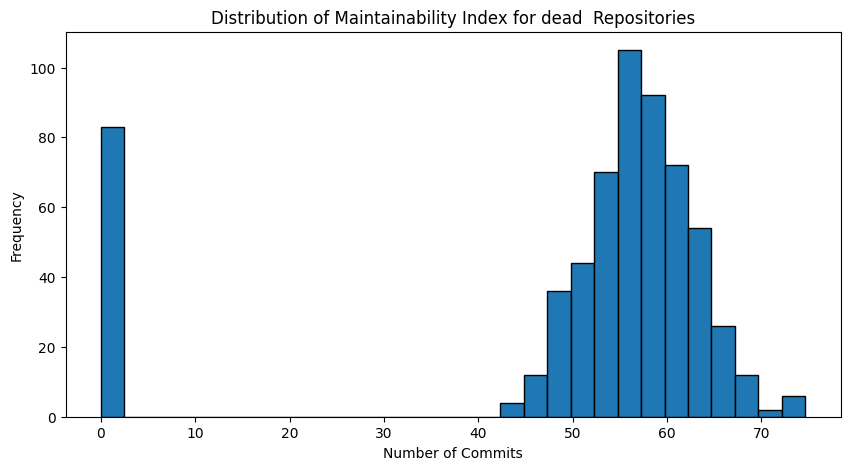

In [543]:
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['Maintainability Index'], bins=30, edgecolor='black')
plt.title('Distribution of Maintainability Index for dead  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

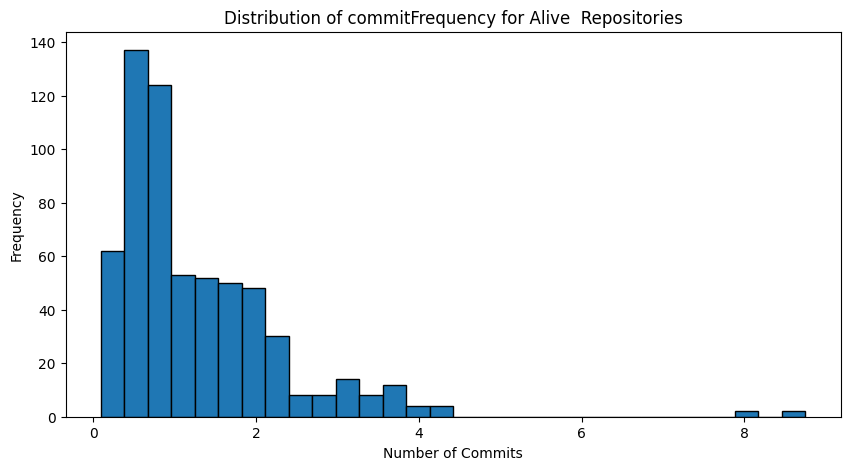

In [532]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['commitFrequency'], bins=30, edgecolor='black')
plt.title('Distribution of commitFrequency for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

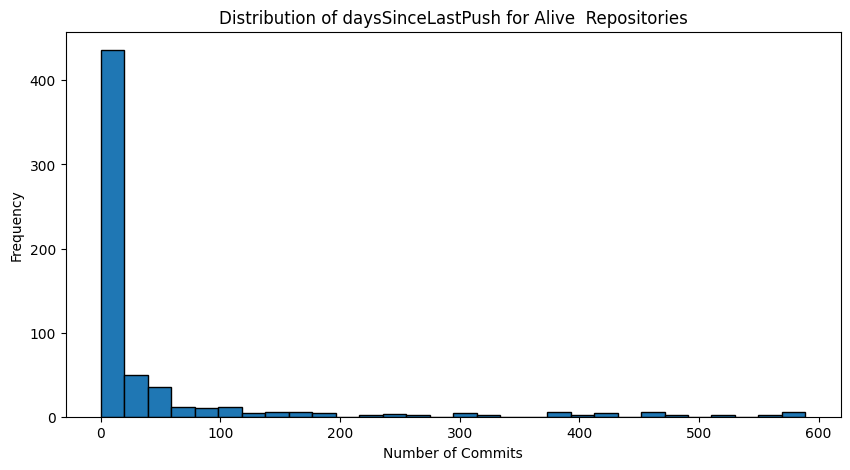

In [533]:
plt.figure(figsize=(10, 5))
plt.hist(alive_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

#### dead repos 

In [534]:
dead_repos = repo[repo['Status'] == 'dead']

descriptive_stats = dead_repos.describe()

descriptive_stats


,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,totalDeletions,fileCount,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
count,338.000000,338,338,338.000000,338.000000,338.000000,338.000000,3.380000e+02,3.380000e+02,338.000000,...,338.000000,338.000000,3.380000e+02,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000,338.000000
mean,20127.352071,2013-06-23 00:25:08.286982400,2022-11-22 10:00:38.591716096,2030.153846,431.692308,1776.414201,2208.106509,6.538803e+05,5.061842e+05,522.136095,...,0.072604,2151.879745,4.834359e+01,0.274945,380.284024,3438.899408,0.667586,0.804436,0.186248,6.136095
min,23.000000,2008-06-18 23:30:53,2015-12-17 17:54:50,16.000000,0.000000,0.000000,0.000000,3.660000e+02,1.690000e+02,2.000000,...,0.000000,0.000000,-7.105427e-15,0.000000,0.000000,36.000000,0.015342,0.000000,0.000000,0.000000
25%,11172.000000,2011-09-21 15:16:20,2022-11-29 01:10:53.500000,1284.000000,116.000000,768.000000,903.000000,6.137525e+04,3.126200e+04,109.500000,...,0.010000,797.948115,5.221703e+01,0.116028,3.250000,2797.000000,0.362901,0.745121,0.103965,5.000000
50%,16500.000000,2013-06-25 17:31:52,2023-10-27 16:01:32,1760.000000,246.000000,1441.000000,1757.000000,2.068670e+05,1.158610e+05,267.500000,...,0.040000,1500.684177,5.662808e+01,0.165192,41.000000,3458.000000,0.543339,0.854737,0.141772,6.000000
75%,24539.250000,2015-01-15 09:35:51,2023-12-04 12:50:16.750000128,2515.000000,464.000000,2219.000000,2746.000000,5.300180e+05,3.084440e+05,587.000000,...,0.117500,2437.260339,5.950303e+01,0.322504,373.750000,4286.000000,0.792927,0.895154,0.243857,9.000000
max,80436.000000,2023-09-25 14:48:55,2023-12-08 04:35:05,8342.000000,7888.000000,18637.000000,20803.000000,8.464295e+06,6.062040e+06,6506.000000,...,0.590000,29128.903669,7.179675e+01,2.030303,2912.000000,5357.000000,6.167401,0.999547,0.670000,9.000000
std,13831.502229,NaN,NaN,1258.153972,733.010973,1858.198004,2305.578235,1.303068e+06,1.145670e+06,876.173407,...,0.095518,2835.057158,2.117595e+01,0.311912,648.025480,1059.260285,0.614223,0.142557,0.128534,3.273733


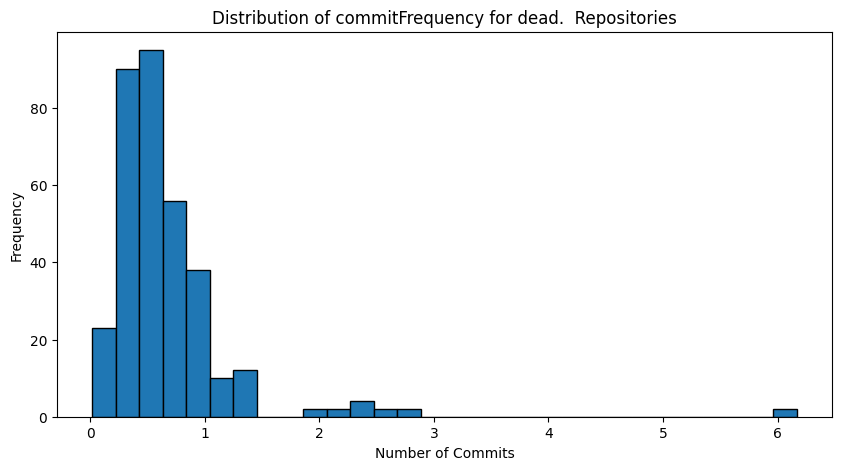

In [539]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['commitFrequency'], bins=30, edgecolor='black')
plt.title('Distribution of commitFrequency for dead.  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()



plt.figure(figsize=(10, 5))
plt.hist(alive_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Alive  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

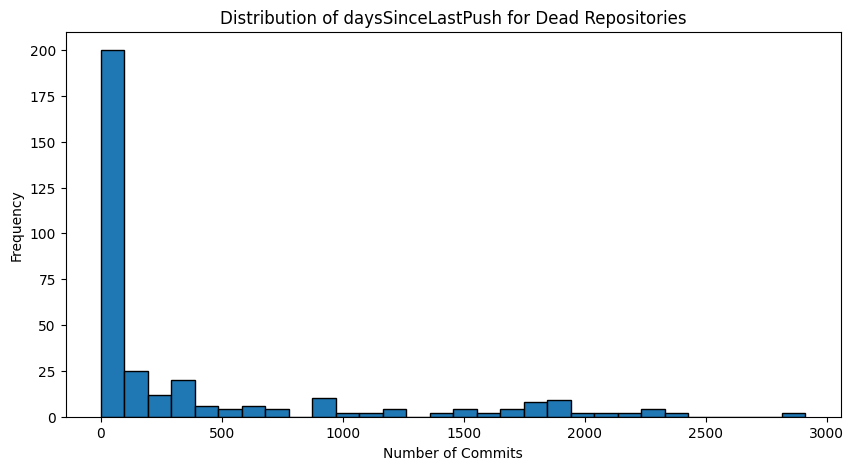

In [536]:
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['daysSinceLastPush'], bins=30, edgecolor='black')
plt.title('Distribution of daysSinceLastPush for Dead Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

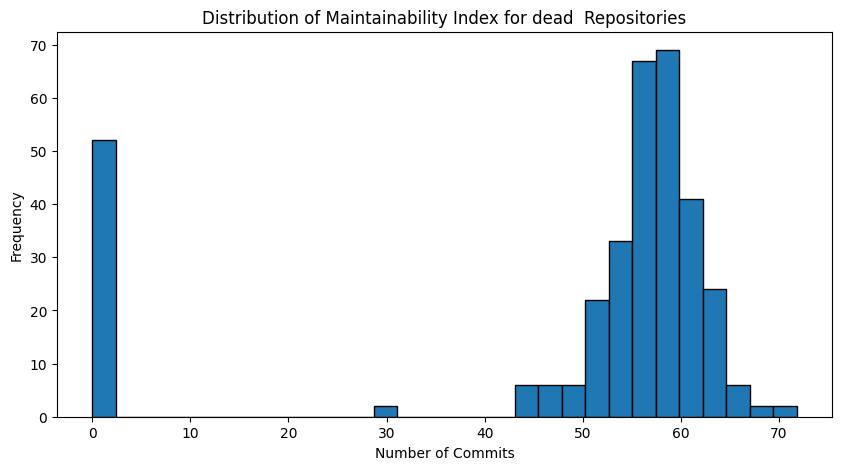

In [542]:
# Plot the distribution for a specific feature, e.g., 'numCommits'
plt.figure(figsize=(10, 5))
plt.hist(dead_repos['Maintainability Index'], bins=30, edgecolor='black')
plt.title('Distribution of Maintainability Index for dead  Repositories')
plt.xlabel('Number of Commits')
plt.ylabel('Frequency')
plt.show()

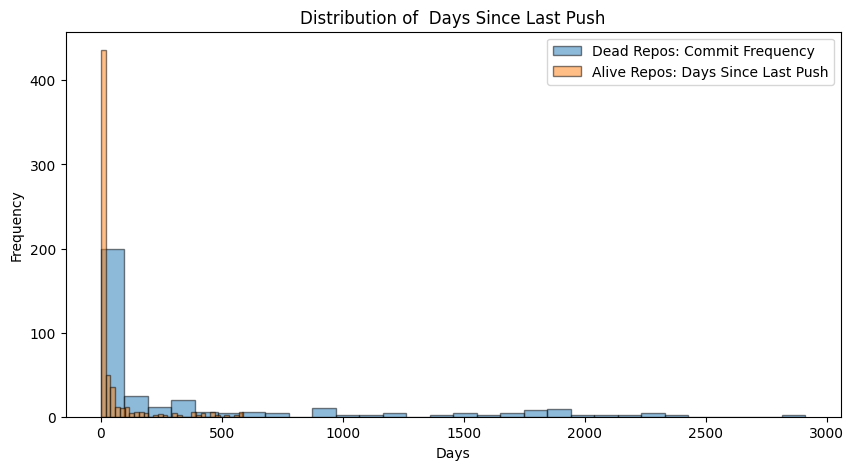

In [548]:


plt.figure(figsize=(10, 5))

# Plotting 'commitFrequency' for dead repositories
plt.hist(dead_repos['daysSinceLastPush'], bins=30, alpha=0.5, label='Dead Repos: Commit Frequency', edgecolor='black')

# Plotting 'daysSinceLastPush' for alive repositories
plt.hist(alive_repos['daysSinceLastPush'], bins=30, alpha=0.5, label='Alive Repos: Days Since Last Push', edgecolor='black')
 
plt.title('Distribution of  Days Since Last Push')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [418]:
repo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 953
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   owner                  956 non-null    object        
 1   repo                   956 non-null    object        
 2   stars                  956 non-null    float64       
 3   dateCreated            956 non-null    datetime64[ns]
 4   datePushed             956 non-null    datetime64[ns]
 5   numCommits             956 non-null    float64       
 6   openIssues             956 non-null    float64       
 7   closedIssues           956 non-null    float64       
 8   totalIssues            956 non-null    float64       
 9   totalAdditions         956 non-null    float64       
 10  totalDeletions         956 non-null    float64       
 11  fileCount              956 non-null    float64       
 12  include                956 non-null    bool          
 13  Repository

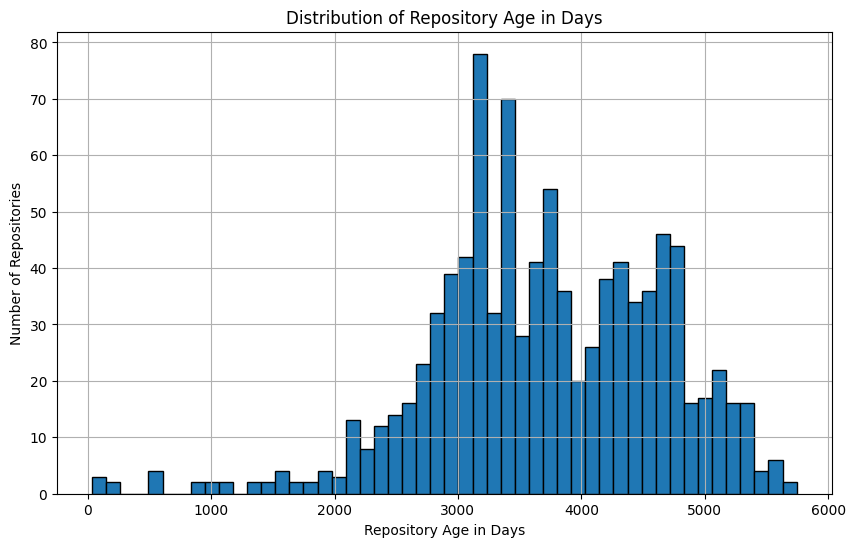

In [423]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(repo['repoAgeDays'], bins=50, edgecolor='black')
plt.title('Distribution of Repository Age in Days')
plt.xlabel('Repository Age in Days')
plt.ylabel('Number of Repositories')
plt.grid(True)
plt.show()


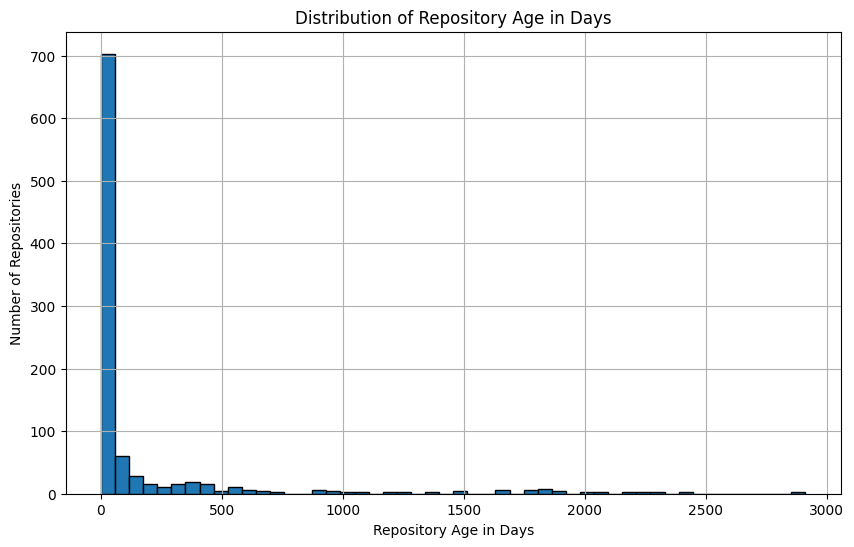

In [424]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(repo['daysSinceLastPush'], bins=50, edgecolor='black')
plt.title('Distribution of Repository Age in Days')
plt.xlabel('Repository Age in Days')
plt.ylabel('Number of Repositories')
plt.grid(True)
plt.show()


In [425]:
num_repos_over_500_days = repo[repo['daysSinceLastPush'] > 500].shape[0]

num_repos_over_500_days

85

In [1305]:
repo

,owner,repo,stars,dateCreated,datePushed,numCommits,openIssues,closedIssues,totalIssues,totalAdditions,...,nloc Rt,Halstead Volume,Maintainability Index,open_close_ratio,daysSinceLastPush,repoAgeDays,commitFrequency,closedIssueRatio,openIssueRatio,Cluster
0,facebook,react,216019.0,2013-05-24 16:15:54,2023-12-08 00:51:20,16117.0,1557.0,25219.0,26776.0,2734078.0,...,0.06,1831.576017,5.703145e+01,0.061737,0.0,3849.0,4.187321,0.941816,0.058147,alive
1,pallets,flask,65156.0,2010-04-06 11:11:59,2023-12-07 03:48:51,5205.0,3.0,5081.0,5084.0,229166.0,...,0.02,2303.064603,5.632143e+01,0.000590,1.0,4992.0,1.042668,0.999213,0.000590,alive
2,google,guetzli,12840.0,2016-10-21 15:13:18,2023-04-22 19:41:10,145.0,121.0,153.0,274.0,30443.0,...,0.25,2521.773565,4.712796e+01,0.785714,229.0,2374.0,0.061078,0.556364,0.440000,dead
3,EbookFoundation,free-programming-books,304317.0,2013-10-11 06:50:37,2023-12-05 18:16:56,9110.0,43.0,10783.0,10826.0,87660.0,...,0.00,1157.136905,-7.105427e-15,0.003987,2.0,3707.0,2.457513,0.995936,0.003972,alive
4,d3,d3,106797.0,2010-09-27 17:22:42,2023-12-01 14:29:45,4480.0,14.0,3334.0,3348.0,673005.0,...,0.00,1158.238502,6.197074e+01,0.004198,6.0,4812.0,0.931006,0.995521,0.004180,alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,natesales,q,1348.0,2021-03-01 06:45:22,2023-11-11 22:58:23,421.0,13.0,68.0,81.0,12128.0,...,0.04,2716.053714,5.979080e+01,0.188406,26.0,985.0,0.427411,0.829268,0.158537,dead
952,zestyping,q,1265.0,2013-03-18 20:22:52,2023-11-23 23:57:42,119.0,18.0,48.0,66.0,2774.0,...,0.04,2716.053714,5.979080e+01,0.367347,14.0,3902.0,0.030497,0.716418,0.268657,dead
953,joschan21,quill,1238.0,2023-09-25 14:48:55,2023-10-31 14:49:55,16.0,37.0,18.0,55.0,15156.0,...,0.01,1776.736712,5.529869e+01,1.947368,37.0,36.0,0.444444,0.321429,0.660714,dead
954,cycfi,q,1022.0,2017-11-04 02:06:19,2023-10-22 06:09:15,1191.0,2.0,66.0,68.0,386949.0,...,0.04,2716.053714,5.979080e+01,0.029851,46.0,2178.0,0.546832,0.956522,0.028986,dead


In [1306]:
repo['Cluster'] = repo['Cluster'].replace({'alive': 1, 'dead': 0})

In [1307]:
repo = repo.rename(columns={'Cluster': 'status'})

In [1308]:
repo.to_csv('Data/ml_data/graph_data_cluster.csv')

In [49]:
from datetime import datetime

repo['closedIssueRatio'] = repo['closedIssues'] / (repo['totalIssues']+ 1)

# Calculate the ratio of open issues to total issues as an indicator of current pending tasks
repo['openIssueRatio'] = repo['openIssues'] / (repo['totalIssues']+ 1)

# Normalizing metrics to ensure they contribute equally to the score
repo['normalizedCommits'] = (repo['numCommits'] - repo['numCommits'].min()) / (repo['numCommits'].max() - repo['numCommits'].min())
repo['normalizedClosedIssueRatio'] = repo['closedIssueRatio']
repo['recentActivity'] = 1 - (repo['daysSinceLastPush'] / repo['daysSinceLastPush'].max())

repo['compositeActivityScore'] = (repo['normalizedCommits'] + repo['normalizedClosedIssueRatio'] + repo['recentActivity']) / 3



In [53]:
repo.to_csv('Data/ml_data/repo_graph.csv')

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

repo['isActive'] = (repo['daysSinceLastPush'] <= 180).astype(int)

 
model_features = ['daysSinceLastPush', 'numCommits', 'closedIssueRatio', 'Maintainability Index']
X = repo[model_features]

 
imputer = SimpleImputer(strategy='median')
X['Maintainability Index'] = imputer.fit_transform(X[['Maintainability Index']])

# Target variable
y = repo['isActive']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

 
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


C:\Users\ethan\AppData\Local\Temp\ipykernel_24656\2960924274.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Maintainability Index'] = imputer.fit_transform(X[['Maintainability Index']])


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        34\n           1       1.00      1.00      1.00       158\n\n    accuracy                           1.00       192\n   macro avg       1.00      1.00      1.00       192\nweighted avg       1.00      1.00      1.00       192\n')

In [14]:
from datetime import datetime

repo['dateCreated'] = pd.to_datetime(repo['dateCreated'], unit='s')
repo['datePushed'] = pd.to_datetime(repo['datePushed'], unit='s')

# Calculate the age of the repository in years
current_date = datetime.now()
repo['repoAgeYears'] = (current_date - repo['dateCreated']).dt.days / 365.25

# Calculate commit frequency as numCommits divided by repoAgeYears
repo['commitFrequency'] = repo['numCommits'] / repo['repoAgeYears']

repo['daysSinceLastCommit'] = (current_date - repo['datePushed']).dt.days

simplified_data = repo[['owner', 'repo', 'repoAgeYears', 'commitFrequency', 'daysSinceLastCommit']]

simplified_data.head()


,owner,repo,repoAgeYears,commitFrequency,daysSinceLastCommit
0,facebook,react,10.710472,1504.788919,63
1,pallets,flask,13.845311,375.939539,64
2,google,guetzli,7.299110,19.865435,292
3,EbookFoundation,free-programming-books,10.329911,881.904983,65
4,d3,d3,13.366188,335.174109,69


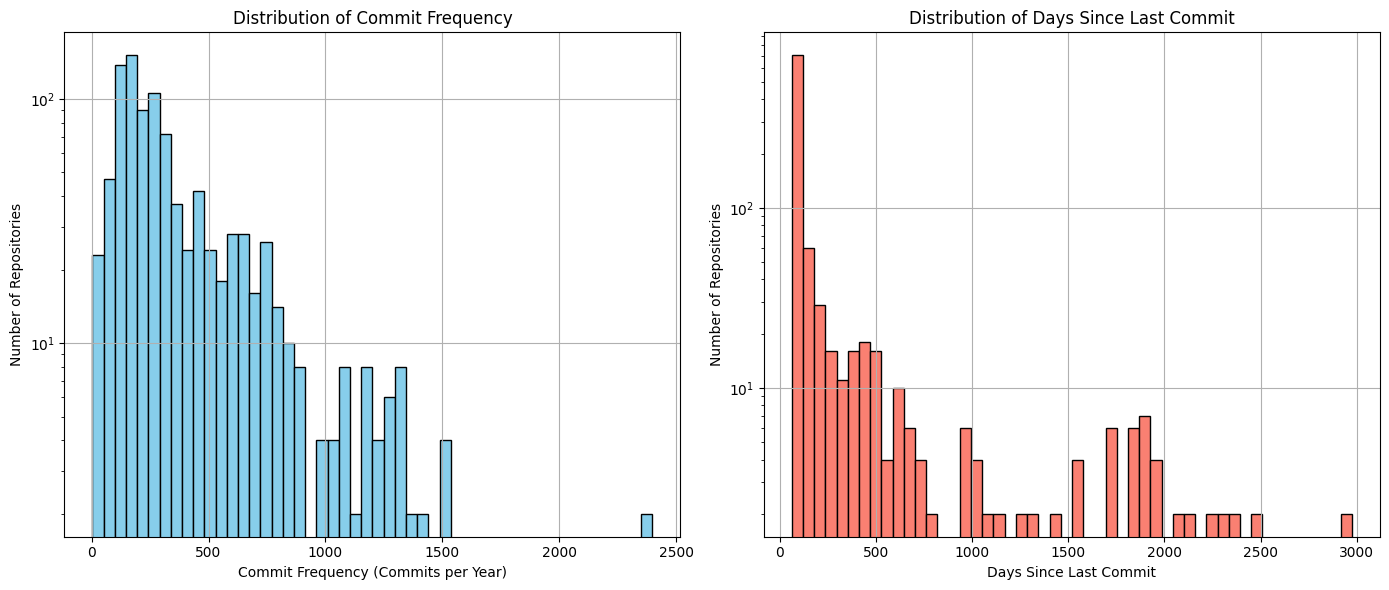

,commitFrequency,daysSinceLastCommit
count,956.000000,956.000000
mean,358.690558,227.131799
std,304.499737,426.124082
min,2.925657,63.000000
25%,155.723596,64.000000
50%,256.603434,71.500000
75%,467.951760,134.000000
max,2398.775399,2975.000000


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the distribution of commit frequency
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(repo['commitFrequency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Commit Frequency')
plt.xlabel('Commit Frequency (Commits per Year)')
plt.ylabel('Number of Repositories')
plt.yscale('log') 
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(repo['daysSinceLastCommit'], bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Days Since Last Commit')
plt.xlabel('Days Since Last Commit')
plt.ylabel('Number of Repositories')
plt.yscale('log') 
plt.grid(True)

plt.tight_layout()
plt.show()

basic_stats = repo[['commitFrequency', 'daysSinceLastCommit']].describe()
basic_stats


In [19]:
repo['classification'] = 'Review' 
repo.loc[(repo['commitFrequency'] > 257) & (repo['daysSinceLastCommit'] <= 180), 'classification'] = 'Active'
repo.loc[(repo['commitFrequency'] <= 257) | (repo['daysSinceLastCommit'] > 180), 'classification'] = 'Potential Dead'

classification_counts = repo['classification'].value_counts()

active_repo = repo[repo['classification'] == 'Active'].sort_values(by=['commitFrequency', 'daysSinceLastCommit'], ascending=[False, True]).head(1)

potential_dead_repo = repo[repo['classification'] == 'Potential Dead'].sort_values(by=['daysSinceLastCommit', 'commitFrequency'], ascending=[False, False]).head(1)

# Combine the selections for display
case_study_candidates = pd.concat([active_repo, potential_dead_repo])

case_study_candidates[['owner', 'repo', 'stars', 'repoAgeYears', 'commitFrequency', 'daysSinceLastCommit', 'classification']]


,owner,repo,stars,repoAgeYears,commitFrequency,daysSinceLastCommit,classification
68,toddmotto,public-apis,1587,1.886379,2398.775399,171,Active
392,JakeWharton,ActionBarSherlock,7126,12.925394,114.503283,2975,Potential Dead
